1) Load Dataset

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1, # adds a small amount of noise
                           class_sep=1.0, # classes are separable but not too easily
                           random_state=40)

2) Implement soft margin SVM

In [ ]:
y = np.where(y == False, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

def predict(X, w, b):
    m = X.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = np.dot(w,X[i]) + b
    y_pred = np.sign(y_pred)
    return y_pred

"""
def calc_loss(X, y, w, b, C):
    m = X.shape[0]
    margin = (np.dot(w,w)**2)/2
    hinge = 0;
    for i in range(m):
        hinge += max(0, 1 - y * (np.dot(w,X[i])+b))
    return (C * hinge) + margin
"""

def calc_gradient(X, y, w, b, C):
    m = X.shape[0]
    n = X.shape[1]

    dw = np.zeros(n)
    db = 0
    margin = np.dot(w, w) / 2
    hinge = 0;

    for i in range(m):
        hinge_condition = (1 - y[i] * (np.dot(w, X[i]) + b)) > 0
        hinge += max(0, 1 - y[i] * (np.dot(w,X[i])+b))
        if(hinge_condition):
            dw += w - C * y[i] * X[i]
            db -= C * y[i]
        else:
            dw += w

    loss = C * hinge + margin
    return dw, db, loss

def gradient_descent(X, y, w, b, C, epoch, alpha):
    total_loss = []
    for i in range(epoch):
        dw, db, loss = calc_gradient(X, y, w, b, C)
        w -= alpha * dw
        b -= alpha * db
        total_loss.append(loss)
    return w, b, total_loss

epoch = 100
alpha = 0.001
features = 3
w = np.zeros(features)
b = 0
C = 1
batch_size = 10

w, b, loss = gradient_descent(X_train, y_train, w, b, C, epoch, alpha)


3) Plot Truth vs. Prediction plot on 2d

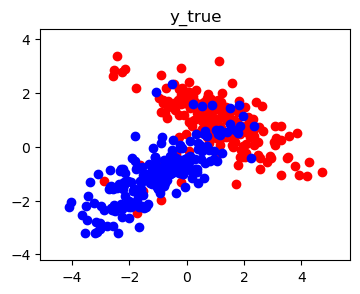

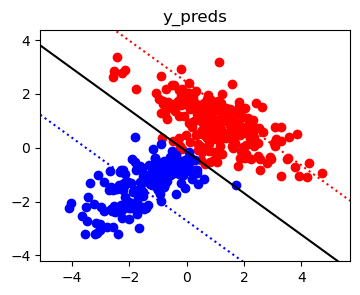

In [ ]:
def plot_true_vs_preds(X, y, w, b):
    xlim = np.array([X[:,0].min()-1, X[:,0].max()+1])
    ylim = np.array([X[:,1].min()-1, X[:,1].max()+1])

    plt.figure(figsize=(4,3))
    plt.scatter(X[:,0][y==-1], X[:,1][y==-1], c='r', label='y=-1')
    plt.scatter(X[:,0][y==1], X[:,1][y==1], c='b', label='y=-1')
    plt.title("y_true")
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    plt.figure(figsize=(4,3))
    y_preds = predict(X, w, b)
    plt.scatter(X[:,0][y_preds==-1], X[:,1][y_preds==-1], c='red', label='y=-1')
    plt.scatter(X[:,0][y_preds==1], X[:,1][y_preds==1], c='blue', label='y=1')
    plt.title("y_preds")
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    xx = xlim
    yyn = (-1 - b - (w[0] * xx)) / w[1]
    yym =     (-b - (w[0] * xx)) / w[1]
    yyp =  (1 - b - (w[0] * xx)) / w[1]

    plt.plot(xx, yyn, color='red', linestyle='dotted')
    plt.plot(xx, yym, color='black')
    plt.plot(xx, yyp, color='blue', linestyle='dotted')

plot_true_vs_preds(X_train, y_train, w, b)

4) Define Mini Batch Gradient Descent

In [ ]:
def mini_batch_GD(X, y, w, b, C, epoch, alpha, batch_size):
    m = X.shape[0]
    total_loss = []

    for i in range(epoch):
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        epoch_loss = 0

        for start in range(0, m, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            dw, db, loss = calc_gradient(X_batch, y_batch, w, b, C)
            w -= alpha * dw
            b -= alpha * db
            epoch_loss += loss
        total_loss.append(epoch_loss)

    return w, b, total_loss


w_mb = np.zeros(features)
b_mb = 0
w_mb, b_mb, m_loss = mini_batch_GD(X_train, y_train, w_mb, b_mb, C, epoch, alpha, batch_size)
print(w_mb)
print(b_mb)

[-0.3103587  -0.40409762 -0.07655656]
-0.06600000000000007


5) Perform some predictions on the test data

In [ ]:
y_pred = predict(X_test, w, b)
print(y_pred)

[-1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
  1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.
 -1.  1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1.
  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


6) Calculate the accuracy score

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.82


7) Visualize the training data and decision boundary in 3D

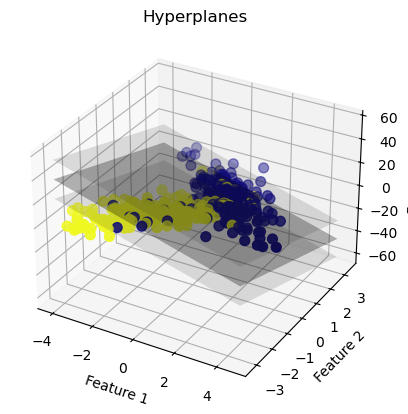

In [ ]:
def plot3d(X, y, w, b):
    fig = plt.figure()
    axis = plt.axes(projection='3d')
    axis.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.plasma, s=50)
    xx, yy = np.meshgrid(
        np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 50),
        np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 50)
    )

    #Decision Bounrady
    zz = (-w[0] * xx - w[1] * yy - b) / w[2]
    #Margin hyperplanes
    zz_up_margin = (-w[0] * xx - w[1] * yy - b + 1) / w[2]
    zz_down_margin = (-w[0] * xx - w[1] * yy - b - 1) / w[2]

    axis.plot_surface(xx, yy, zz, alpha=0.3, color='black')
    axis.plot_surface(xx, yy, zz_up_margin, alpha=0.15, color='grey')
    axis.plot_surface(xx, yy, zz_down_margin, alpha=0.15, color='grey')

    axis.set_xlabel('Feature 1')
    axis.set_ylabel('Feature 2')
    axis.set_zlabel('Feature 3')
    plt.title('Hyperplanes')
    plt.show()

plot3d(X_train, y_train, w, b)


8) Visualize the loss function over time during training

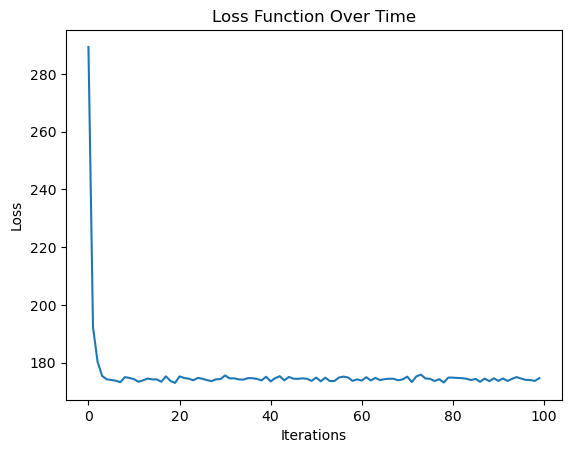

In [ ]:
def plot_loss(loss):
    plt.plot(loss)
    plt.title('Loss Function Over Time')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

plot_loss(m_loss)